In [2]:
pip install tensorflow


  Using cached tensorflow-2.17.0-cp310-cp310-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp310-cp310-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.4-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp310-cp310-win_amd64.whl.metadata (

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.17.0'

### Scaling images for training and testing dataset

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

training_set = train_datagen.flow_from_directory('Data/training_set/training_set', target_size = (64,64), batch_size = 32, class_mode = 'binary')


Found 8005 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_set = test_datagen.flow_from_directory('Data/test_set/test_set', target_size = (64,64), batch_size = 32, class_mode = 'binary')


Found 2023 images belonging to 2 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

C:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides = 2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))

### compiling CNN


In [13]:
cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


C:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 125s 490ms/step - accuracy: 0.5421 - loss: 0.6996 - val_accuracy: 0.6500 - val_loss: 0.6454
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 77s 298ms/step - accuracy: 0.6264 - loss: 0.6504 - val_accuracy: 0.6426 - val_loss: 0.6409
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - accuracy: 0.6583 - loss: 0.6201 - val_accuracy: 0.6925 - val_loss: 0.5966
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 149ms/step - accuracy: 0.7002 - loss: 0.5751 - val_accuracy: 0.7113 - val_loss: 0.5672
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - accuracy: 0.7326 - loss: 0.5358 - val_accuracy: 0.7375 - val_loss: 0.5365
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - accuracy: 0.7482 - loss: 0.5139 - val_accuracy: 0.7568 - val_loss: 0.5184
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 118ms/step - accuracy: 0.7604 - loss: 0.4880 - val_accuracy: 0.7484 - val_loss: 0.5086
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 118ms/step - accuracy: 0.7734 - loss: 0.4645 - va

In [24]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('test1.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'cat'
else:
    prediction = 'dog'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


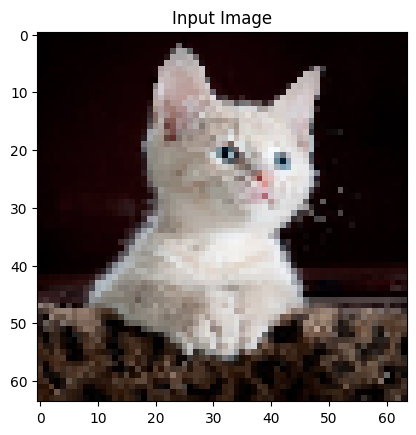

Prediction :  cat


In [25]:
import matplotlib.pyplot as plt

plt.imshow(test_image[0].astype('uint8'))
plt.title("Input Image")
plt.show()

print("Prediction : ", prediction)